In [1]:
import pingouin as pg
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import poisson, binom


np.random.seed(300)

In [2]:
data = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
test.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
data['Response'].value_counts(normalize=True)

Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64

In [8]:
data.describe(include='object')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [9]:
data['Gender'].value_counts(normalize=True).reset_index()



,Gender,proportion
0,Male,0.540761
1,Female,0.459239


In [10]:
data['Vehicle_Age'].value_counts(normalize=True).reset_index()


,Vehicle_Age,proportion
0,1-2 Year,0.525613
1,< 1 Year,0.432385
2,> 2 Years,0.042001


In [11]:
vehicle_damage = data['Vehicle_Damage'].value_counts(normalize = True).reset_index()

vehicle_damage

,Vehicle_Damage,proportion
0,Yes,0.504877
1,No,0.495123


In [12]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [13]:
int_dtype = data.select_dtypes(include=['int', 'float']).columns
discrete = [x for x in int_dtype if data[x].nunique() < 3 and x != 'Response']
continous = [x for x in int_dtype if data[x].nunique() > 3 and x not in ['id', 'Region_Code']]
catgorical = data.select_dtypes(include='object').columns

In [14]:
print(f"All continuous columns are as followed: {continous}")
print(f'All discrete columns are as followed : {discrete}')
print(f'All categorical column are as followed ; {catgorical}')

All continuous columns are as followed: ['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
All discrete columns are as followed : ['Driving_License', 'Previously_Insured']
All categorical column are as followed ; Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')


In [15]:
data[continous].describe()

,Age,Annual_Premium,Policy_Sales_Channel,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,112.034295,154.347397
std,15.511611,17213.155057,54.203995,83.671304
min,20.000000,2630.000000,1.000000,10.000000
25%,25.000000,24405.000000,29.000000,82.000000
50%,36.000000,31669.000000,133.000000,154.000000
75%,49.000000,39400.000000,152.000000,227.000000
max,85.000000,540165.000000,163.000000,299.000000


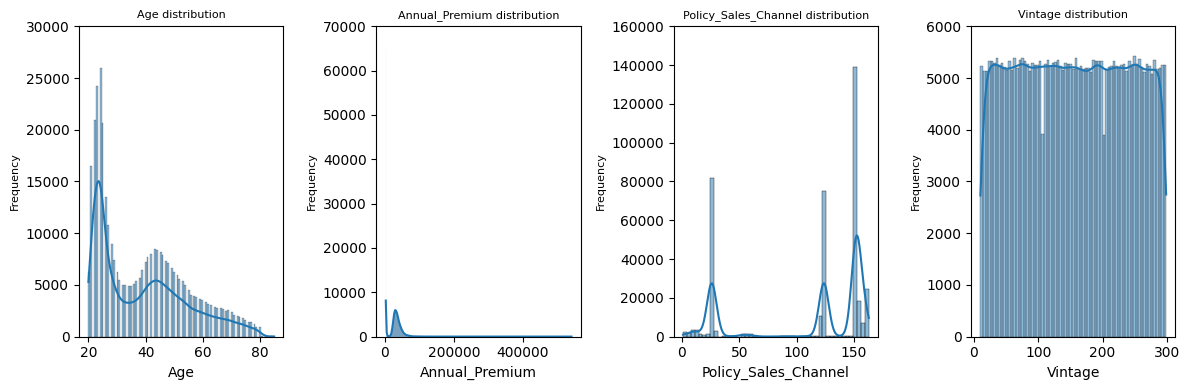

In [16]:
fig, axes = plt.subplots(1, len(continous), figsize = (12, 4))
for  i, col in enumerate(continous):
    sns.histplot(x= col, data = data, ax=axes[i], kde = True)
    axes[i].set_yticks(axes[i].get_yticks())
    axes[i].tick_params(axis='y', labelsize=10)
    axes[i].set_title(f'{col} distribution', fontsize = 8) 
    axes[i].set_ylabel('Frequency', fontsize = 8)
plt.tight_layout()

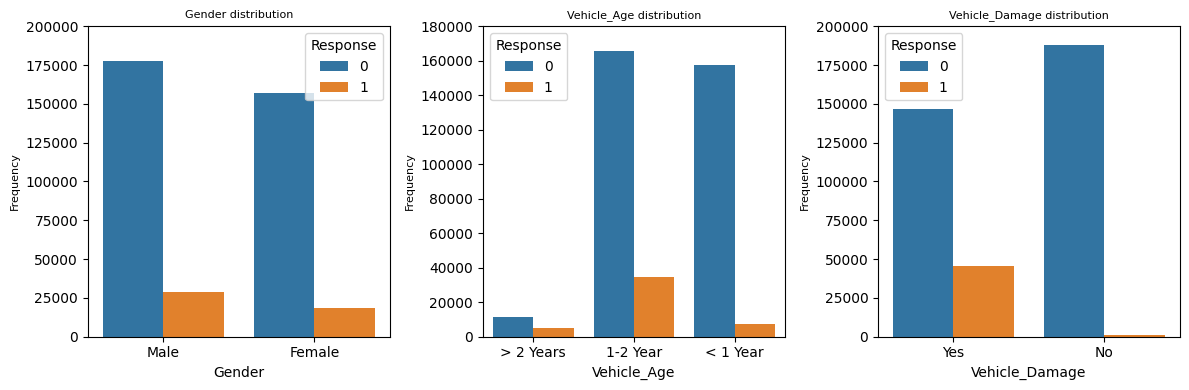

In [17]:
fig, axes = plt.subplots(1, len(catgorical), figsize = (12, 4))
for  i, col in enumerate(catgorical):
    sns.countplot(x= col, data = data, ax=axes[i], hue ='Response')
    axes[i].set_yticks(axes[i].get_yticks())
    axes[i].tick_params(axis='y', labelsize=10)
    axes[i].set_title(f'{col} distribution', fontsize = 8) 
    axes[i].set_ylabel('Frequency', fontsize = 8)
plt.tight_layout()

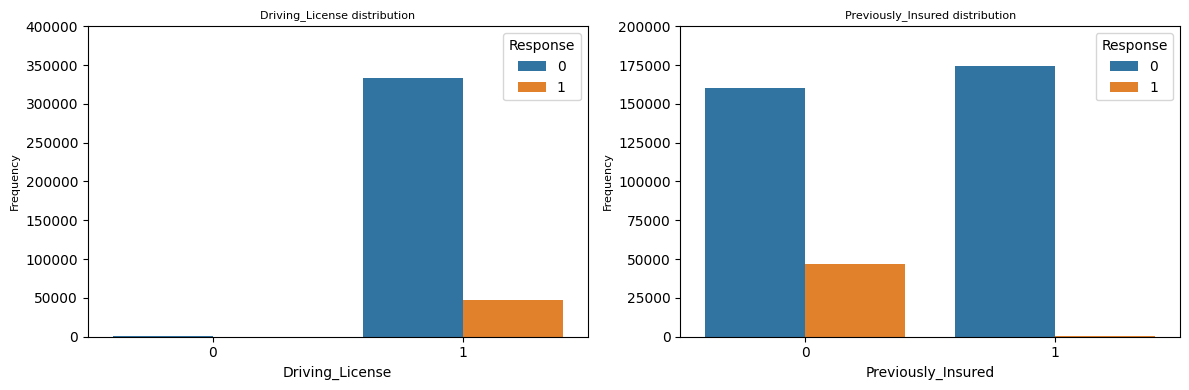

In [18]:
fig, axes = plt.subplots(1, len(discrete), figsize = (12, 4))
for  i, col in enumerate(discrete):
    sns.countplot(x= col, data = data, ax=axes[i], hue ='Response')
    axes[i].set_yticks(axes[i].get_yticks())
    axes[i].tick_params(axis='y', labelsize=10)
    axes[i].set_title(f'{col} distribution', fontsize = 8) 
    axes[i].set_ylabel('Frequency', fontsize = 8)
plt.tight_layout()

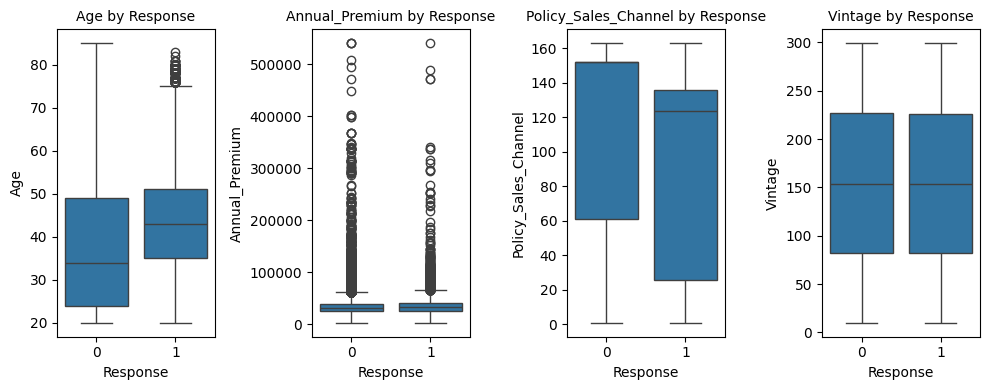

In [19]:
fig, axes = plt.subplots(1, len(continous), figsize = (10, 4))
for i, col in enumerate(continous):
    sns.boxplot(y= col, x = 'Response', data = data, ax = axes[i])
    axes[i].tick_params(axis='y', labelsize=10) 
    axes[i].set_title(f'{col} by Response', fontsize=10)  

plt.tight_layout()

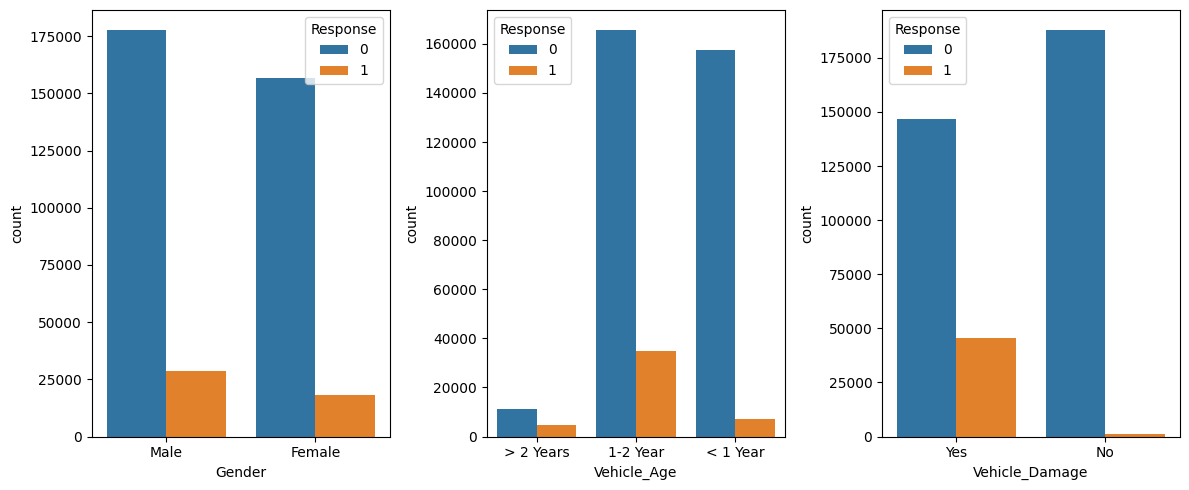

In [20]:
fig, axes = plt.subplots(1, len(catgorical), figsize=(12, 5))
for i, col in enumerate(catgorical): 
    sns.countplot(x = col, hue= 'Response', data =data , ax= axes[i],)
    
plt.tight_layout()

In [21]:
# sns.pairplot(data=data, vars=continous, hue = 'Response')
# plt.tight_layout()

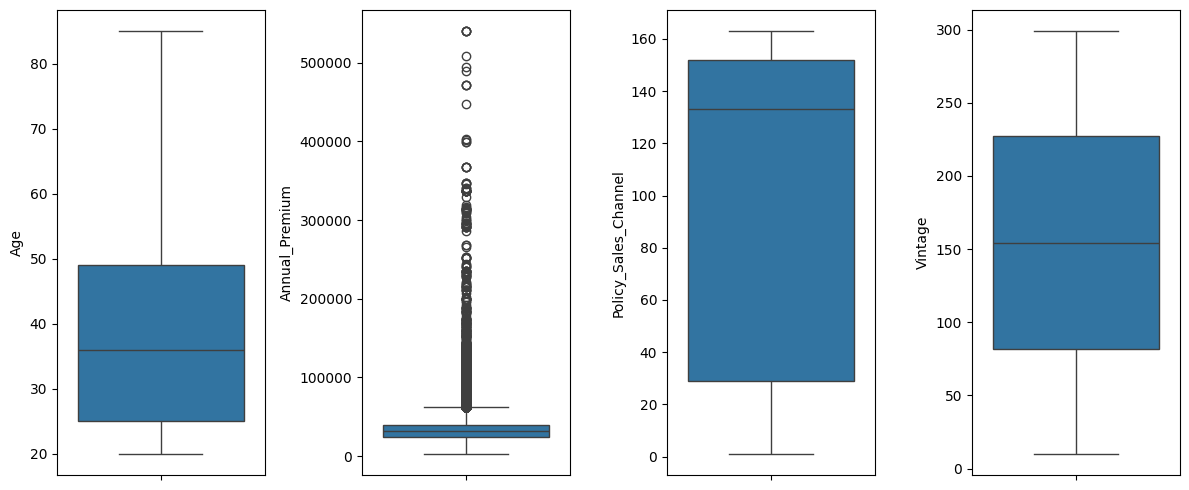

In [22]:
fig, axes = plt.subplots(1, len(continous), figsize=(12, 5))
for i, col in enumerate(continous): 
    sns.boxplot(y = col, data =data , ax= axes[i],)
plt.tight_layout()

Text(0.5, 1.0, 'Heatmap')

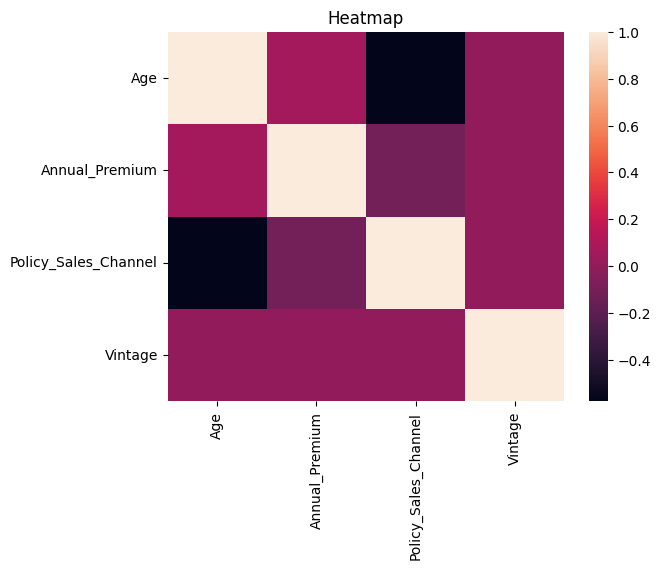

In [23]:
sns.heatmap(data[continous].corr())
plt.title('Heatmap')

<Axes: xlabel='Vintage', ylabel='Annual_Premium'>

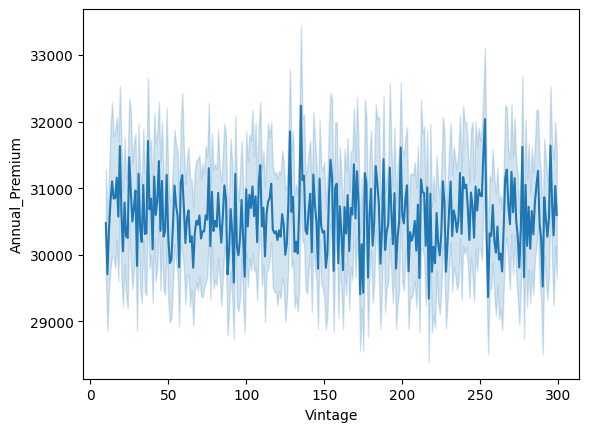

In [24]:
sns.lineplot(x = 'Vintage', y ='Annual_Premium', data = data)

In [25]:
data['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [26]:

data['Vehicle_Age'] = data['Vehicle_Age'].replace({'> 2 Years':'longer', '1-2 Year':'medium', '< 1 Year':'short'})
test['Vehicle_Age'] = test['Vehicle_Age'].replace({'> 2 Years':'longer', '1-2 Year':'medium', '< 1 Year':'short'})

In [27]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,longer,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,medium,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,longer,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,short,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,short,No,27496.0,152.0,39,0


In [28]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,short,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,medium,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,medium,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,short,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,short,No,59097.0,152.0,297


In [29]:
for col in continous:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    IQR = Q3 - Q1

    upper_limit = Q3 + 1.5*IQR
    lower_limit = Q1 - 1.5*IQR

    outliers = data[(data[col]< lower_limit) | (data[col] > upper_limit)]

    perecentage = (len(outliers) * 100) / len(data)
    
    print(f"Percentage of outliers for {col}: {perecentage:.2f}%")


Percentage of outliers for Age: 0.00%
Percentage of outliers for Annual_Premium: 2.71%
Percentage of outliers for Policy_Sales_Channel: 0.00%
Percentage of outliers for Vintage: 0.00%


In [30]:
Q1 = data['Annual_Premium'].quantile(0.25)
Q3 = data['Annual_Premium'].quantile(0.75)

IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

train = data[(data['Annual_Premium'] >= lower_limit) & (data['Annual_Premium'] <= upper_limit)]

In [31]:
row_difference = len(data) - len(train)

print(f'Number of removed outliers rows : {row_difference}')

Number of removed outliers rows : 10320


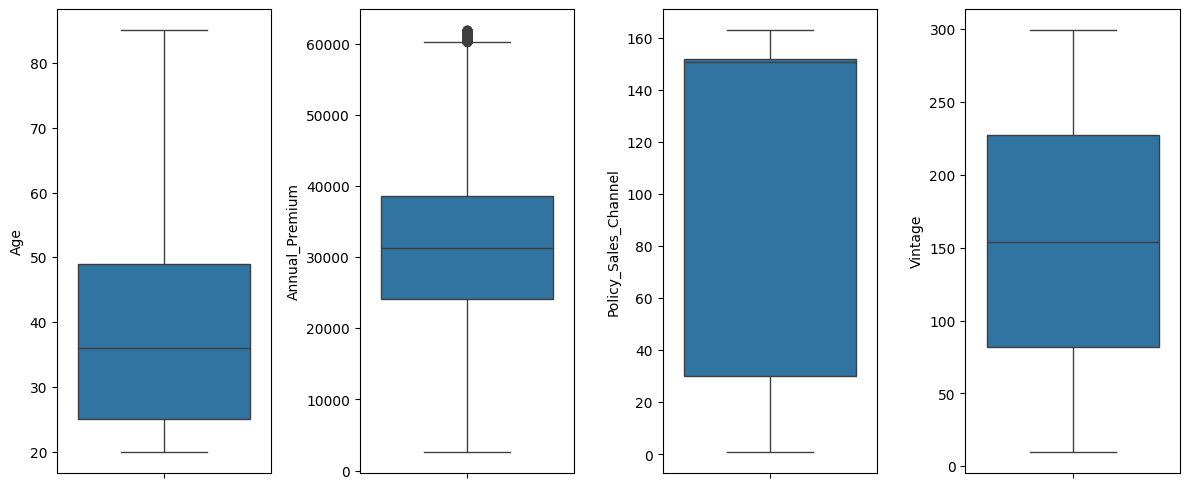

In [32]:
fig, axes = plt.subplots(1, len(continous), figsize=(12, 5))
for i, col in enumerate(continous): 
    sns.boxplot(y = col, data =train , ax= axes[i],)
plt.tight_layout()

In [33]:
from statsmodels.api import qqplot

In [34]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,longer,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,medium,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,longer,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,short,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,short,No,27496.0,152.0,39,0


In [35]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,short,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,medium,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,medium,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,short,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,short,No,59097.0,152.0,297


In [36]:
train.drop(labels=['id', 'Region_Code'], axis=1, inplace=True)
test.drop(labels=['id', 'Region_Code'], axis=1, inplace=True)

/var/folders/kf/yv1zrfvd701c47vqp5xz4sjh0000gn/T/ipykernel_38431/854687910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(labels=['id', 'Region_Code'], axis=1, inplace=True)


In [37]:
train['Response'].value_counts()

Response
0    325634
1     45155
Name: count, dtype: int64

In [38]:
yes = train[train['Response']==1]
no = train[train['Response']==0]

In [39]:
no_sample = no.sample(n= len(yes))

train_sample = pd.concat([no_sample, yes], axis = 0)

In [40]:
train_sample.shape

(90310, 10)

In [41]:
train_sample['Response'].value_counts(normalize=True)

Response
0    0.5
1    0.5
Name: proportion, dtype: float64

In [42]:
train_sample.head()


,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
46894,Male,69,1,1,medium,No,27600.0,122.0,245,0
46406,Female,43,1,1,medium,No,27203.0,122.0,90,0
182792,Male,27,1,1,short,No,27416.0,152.0,50,0
232687,Female,23,1,1,short,No,53859.0,152.0,210,0
39640,Female,57,1,1,medium,No,27230.0,152.0,128,0


In [43]:
# train['Vehicle_Age'] = train['Vehicle_Age'].map({'short':0, 'medium':1, 'longer':2})
# test['Vehicle_Age'] = test['Vehicle_Age'].map({'short':0, 'medium':1, 'longer':2})


In [44]:
train_sample['Customer_Loyalty'] = (train_sample['Vintage'] / max(train_sample['Vintage'])) * (1 + train_sample['Previously_Insured'])
test['Customer_Loyalty'] = (test['Vintage'] / max(test['Vintage'])) * (1 + test['Previously_Insured'])


In [45]:
# train['Risk_Score'] = (train['Age'] / max(train['Age'])) * 0.4 + (train['Vehicle_Age'] / max(train['Vehicle_Age'])) * 0.3 + (train['Vehicle_Damage'] * 0.2) + (1 - train['Previously_Insured']) * 0.1
# test['Risk_Score'] = (test['Age'] / max(test['Age'])) * 0.4 + (test['Vehicle_Age'] / max(test['Vehicle_Age'])) * 0.3 + (test['Vehicle_Damage'] * 0.2) + (1 - test['Previously_Insured']) * 0.1

In [46]:
train.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,0,longer,Yes,40454.0,26.0,217,1
1,Male,76,1,0,medium,No,33536.0,26.0,183,0
2,Male,47,1,0,longer,Yes,38294.0,26.0,27,1
3,Male,21,1,1,short,No,28619.0,152.0,203,0
4,Female,29,1,1,short,No,27496.0,152.0,39,0


In [47]:
train.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,0,longer,Yes,40454.0,26.0,217,1
1,Male,76,1,0,medium,No,33536.0,26.0,183,0
2,Male,47,1,0,longer,Yes,38294.0,26.0,27,1
3,Male,21,1,1,short,No,28619.0,152.0,203,0
4,Female,29,1,1,short,No,27496.0,152.0,39,0


In [48]:
cat_update = train_sample.select_dtypes(include='object').columns

cat_update

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [49]:
# train = pd.get_dummies(train, dtype='int')
# test = pd.get_dummies(test, dtype='int')

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in cat_update:
    label_encoders[column] = LabelEncoder()
    train_sample[column] = label_encoders[column].fit_transform(train_sample[column])
    test[column] = label_encoders[column].fit_transform(test[column])

In [50]:
train.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,0,longer,Yes,40454.0,26.0,217,1
1,Male,76,1,0,medium,No,33536.0,26.0,183,0
2,Male,47,1,0,longer,Yes,38294.0,26.0,27,1
3,Male,21,1,1,short,No,28619.0,152.0,203,0
4,Female,29,1,1,short,No,27496.0,152.0,39,0


In [51]:
test.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Customer_Loyalty
0,1,25,1,1,2,0,35786.0,152.0,53,0.354515
1,1,40,1,0,1,1,33762.0,7.0,111,0.371237
2,1,47,1,0,1,1,40050.0,124.0,199,0.665552
3,1,24,1,1,2,1,37356.0,152.0,187,1.250836
4,1,27,1,1,2,0,59097.0,152.0,297,1.986622


Age


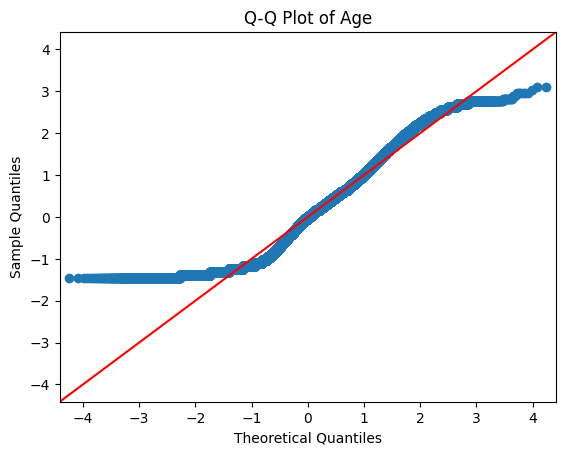

Annual_Premium


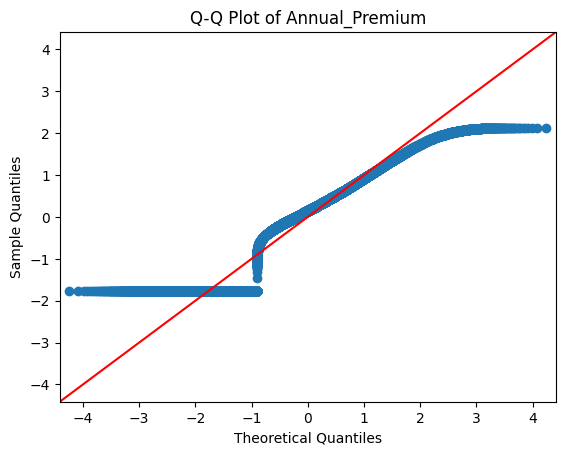

Policy_Sales_Channel


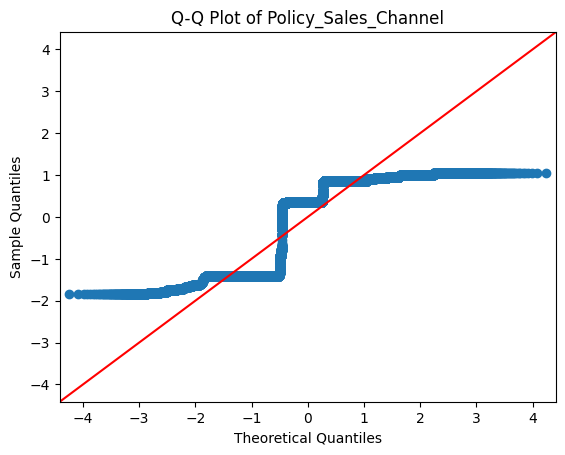

Vintage


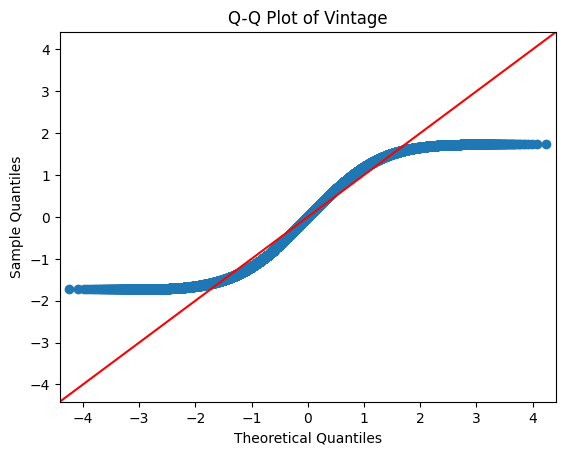

In [78]:
for col in continous:
    print(col)
    qqplot(data=train_sample[col], fit=True, line='45')
    plt.title(f'Q-Q Plot of {col}')  # Set title for each plot
    plt.show()

In [53]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# standard = StandardScaler()
# train[continous] = standard.fit_transform(train[continous])


# standard = MinMaxScaler()
# train['Annual_Premium'] = standard.fit_transform(train['Annual_Premium'])

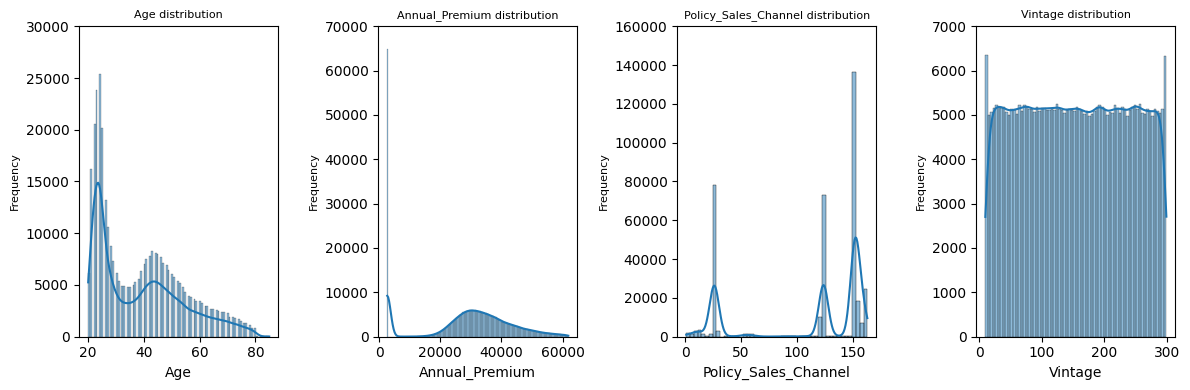

In [54]:
fig, axes = plt.subplots(1, len(continous), figsize = (12, 4))
for  i, col in enumerate(continous):
    sns.histplot(x= col, data = train, ax=axes[i], kde = True)
    axes[i].set_yticks(axes[i].get_yticks())
    axes[i].tick_params(axis='y', labelsize=10)
    axes[i].set_title(f'{col} distribution', fontsize = 8) 
    axes[i].set_ylabel('Frequency', fontsize = 8)
plt.tight_layout()

In [55]:
X = train_sample.drop(labels='Response', axis =1)
y = train_sample['Response']

In [56]:
X.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Customer_Loyalty
46894,1,69,1,1,1,0,27600.0,122.0,245,1.638796
46406,0,43,1,1,1,0,27203.0,122.0,90,0.602007
182792,1,27,1,1,2,0,27416.0,152.0,50,0.334448
232687,0,23,1,1,2,0,53859.0,152.0,210,1.404682
39640,0,57,1,1,1,0,27230.0,152.0,128,0.856187


In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=700, test_size=0.2)

decision = DecisionTreeClassifier()
decision.fit(x_train, y_train)
y_pred = decision.predict(x_test)
test_accuracy = decision.score(x_test, y_test)
train_accuracy = decision.score(x_train, y_train)

print(f"Decision Tree Test Accuracy: {test_accuracy:.2f}")
print(f"Decision Tree Train Accuracy: {train_accuracy:.2f}")
print(f'Decision Tree Precision Score: {precision_score(y_test, y_pred)}')
print(f'Decision Tree Recall Score: {recall_score(y_test, y_pred)}')
print(f'Decision Tree F1 Score: {f1_score(y_test, y_pred)}')
print(f'Decision Tree matthews_corrcoef Score: {matthews_corrcoef(y_test, y_pred)}')

Decision Tree Test Accuracy: 0.71
Decision Tree Train Accuracy: 1.00
Decision Tree Precision Score: 0.7227308692212049
Decision Tree Recall Score: 0.6975019090214901
Decision Tree F1 Score: 0.7098923059842344
Decision Tree matthews_corrcoef Score: 0.42176872962891976


In [59]:
y_train

80970     1
153896    0
165532    1
120788    0
305036    1
         ..
322301    1
258954    1
97953     0
164420    1
343879    0
Name: Response, Length: 72248, dtype: int64

In [60]:
grad = GradientBoostingClassifier()
grad.fit(x_train, y_train)
y_proba = grad.predict_proba(x_test)
y_pred = grad.predict(x_test)
train_accuracy= grad.score(x_train, y_train)
test_accuracy= grad.score(x_test, y_test)

print(f'Gradient Boost Train Accuracy: {train_accuracy:.2f}')
print(f'Gradient Boost Test Accuracy: {test_accuracy:.2f}')
print(f'Gradient Boost Precision Score: {precision_score(y_test, y_pred)}')
print(f'Gradient Boost Recall Score: {recall_score(y_test, y_pred)}')
print(f'Gradient Boost F1 Score: {f1_score(y_test, y_pred)}')
print(f'Gradient Boost matthews_corrcoef Score: {matthews_corrcoef(y_test, y_pred)}')

Gradient Boost Train Accuracy: 0.80
Gradient Boost Test Accuracy: 0.80
Gradient Boost Precision Score: 0.739691395693488
Gradient Boost Recall Score: 0.9256027053561688
Gradient Boost F1 Score: 0.8222695997674193
Gradient Boost matthews_corrcoef Score: 0.6126253259156476


In [61]:
random = RandomForestClassifier(class_weight='balanced')
random.fit(x_train, y_train)
train_accuracy = random.score(x_train, y_train)
test_accuracy = random.score(x_test, y_test)

print(f'Random Forest Train Accuracy: {train_accuracy:.2f}')
print(f'Random Forest Test Accuracy: {test_accuracy:.2f}')

Random Forest Train Accuracy: 1.00
Random Forest Test Accuracy: 0.78


In [62]:
from sklearn.metrics import confusion_matrix, classification_report

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76      8895
           1       0.74      0.93      0.82      9167

    accuracy                           0.80     18062
   macro avg       0.82      0.79      0.79     18062
weighted avg       0.82      0.80      0.79     18062



<Axes: >

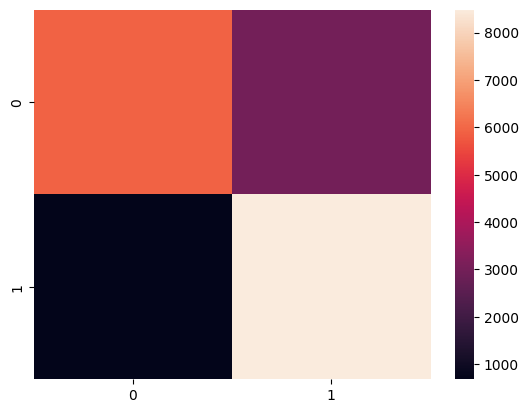

In [64]:
sns.heatmap(confusion_matrix(y_test, y_pred))

In [65]:
from sklearn.model_selection import GridSearchCV


In [66]:
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5]}

# grid_search = GridSearchCV(estimator=grad, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
# grid_search.fit(x_train, y_train)

In [67]:
# print(f"Best Parameters: {grid_search.best_params_}")
# print(f"Best Score: {grid_search.best_score_:.2f}")

In [68]:
# # Get the best model from Grid or Random Search
# best_gbm = grid_search.best_estimator_  # or random_search.best_estimator_

# # Predict on the test set
# y_pred = best_gbm.predict(x_test)

# # Evaluate the model
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test, y_pred)

# print(f"Test Accuracy: {accuracy:.2f}")


In [69]:
# sns.heatmap(confusion_matrix(y_test, y_pred))

In [70]:
from xgboost import XGBClassifier

In [71]:
xgb= XGBClassifier()
xgb.fit(x_train, y_train)
train_accuracy = xgb.score(x_train, y_train)
test_accuracy = xgb.score(x_test, y_test)

print(f'XGBoost Train Accuracy: {train_accuracy:.2f}')
print(f'XGBoost Test Accuracy: {test_accuracy:.2f}')

XGBoost Train Accuracy: 0.82
XGBoost Test Accuracy: 0.80


<Axes: >

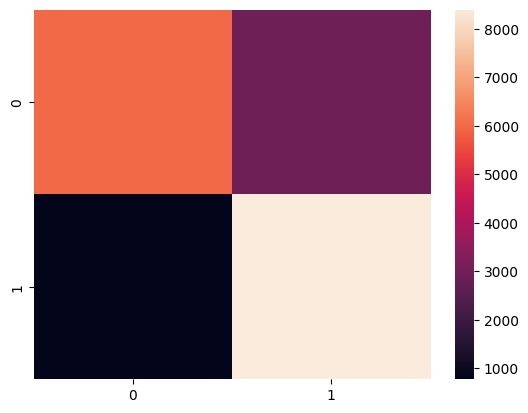

In [72]:
sns.heatmap(confusion_matrix(y_test, xgb.predict(x_test)))

In [73]:
logreg= LogisticRegression()
logreg.fit(x_train, y_train)
train_accuracy = logreg.score(x_train, y_train)
test_accuracy = logreg.score(x_test, y_test)

print(f'XGBoost Train Accuracy: {train_accuracy:.2f}')
print(f'XGBoost Test Accuracy: {test_accuracy:.2f}')

XGBoost Train Accuracy: 0.78
XGBoost Test Accuracy: 0.78


In [74]:
y_test.value_counts()

Response
1    9167
0    8895
Name: count, dtype: int64

In [75]:
y_train.value_counts()

Response
0    36260
1    35988
Name: count, dtype: int64

In [76]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
xgb.fit(x_train, y_train)
train_accuracy = xgb.score(x_train, y_train)
test_accuracy = xgb.score(x_test, y_test)

print(f'XGBoost Train Accuracy: {train_accuracy:.2f}')
print(f'XGBoost Test Accuracy: {test_accuracy:.2f}')

XGBoost Train Accuracy: 0.82
XGBoost Test Accuracy: 0.80
